# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "31"
COLLABORATORS = "Aleksandra Grot 407392, Malgorzata Serwanska 405044, Adam Lewinski 407657"

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    # YOUR CODE HERE
    n=sp.stats.poisson.rvs(intensity*(x_lim[-1]-x_lim[0])*(y_lim[-1]-y_lim[0]))
    X=[]
    Y=[]
    for i in range(n):
        X.append(np.random.random_sample()*(x_lim[-1]-x_lim[0])+x_lim[0])
        Y.append(np.random.random_sample()*(y_lim[-1]-y_lim[0])+y_lim[0])
    d={"X":X,"Y":Y}
    df=pd.DataFrame(data=d)
    return df

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    # YOUR CODE HERE
    dx = (x_lim[-1]-x_lim[0])/grid[-1]
    dy = (y_lim[-1]-y_lim[0])/grid[0]
    x=[]
    y=[]
    for i in range(grid[0]):
        for j in range(grid[-1]):
            x.append(dx/2+j*dx+random_component*(np.random.random_sample()*dx-dx/2))
            y.append(dy/2+i*dy+random_component*(np.random.random_sample()*dy-dy/2))
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    # YOUR CODE HERE
    df = homogeneous_poisson_on_rectangle(parent_intensity,[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius]
                                                          ,[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius])
    x=[]
    y=[]
    def homo_circle(intensity, x, y, r):
        n=sp.stats.poisson.rvs(intensity*np.pi*r*r)
        X=[]
        Y=[]
        for i in range(n):
            alpha = 2 * np.pi * np.random.random_sample()
            c_r = r * np.sqrt(np.random.random_sample())
            X.append(c_r * np.cos(alpha) + x)
            Y.append(c_r * np.sin(alpha) + y)
        return X,Y
    
    for i in range(df.shape[0]):
        AA,BB = homo_circle(daughter_intensity,df["X"].tolist()[i],df["Y"].tolist()[i],cluster_radius)
        c = zip(AA, BB)
        for a,b in c:
            if a>x_lim[0] and a<x_lim[1] and b>y_lim[0] and b<y_lim[1]:
                x.append(a)
                y.append(b)
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df

def point_count_on_subregions(points, bins, x_lim, y_lim):
    # YOUR CODE HERE
    X = np.linspace(x_lim[0],x_lim[1], bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[1], bins[1]+1)
    H,X,Y = np.histogram2d(x = points["X"], y = points["Y"], bins=(X,Y))
    return [X,Y,H]

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [5]:
# YOUR CODE HERE
x_lim=[0,10]
y_lim=[0,10]
poisson=homogeneous_poisson_on_rectangle(2.5,x_lim,y_lim)
regular=regular_on_rectangle([15,15],0.75,x_lim,y_lim)
materna=materna_on_rectangle(0.3,5,0.75,x_lim,y_lim)

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [6]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    d=sp.spatial.distance.cdist(points,points)
    d=np.sort(d,axis=0)
    d=np.sort(d[1,:])
    dUniq=np.unique(d)
    G=np.array([sum(d<=i) for i in dUniq])/len(d)
    d=dUniq
    d=np.insert(d,0,0)
    G=np.insert(G,0,0)
    return pd.DataFrame({"D":d,"G":G})
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    G=1-np.exp(-intensity*np.pi*d*d)
    df={"D":d,"G":G}
    return pd.DataFrame(df)

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
result_poisson=g_function(poisson)
result_regular=g_function(regular)
result_materna=g_function(materna)
teoretic_poisson=g_function_poisson(np.linspace(0,np.max(result_poisson["D"]),num=2000,),2.5)
teoretic_regular=g_function_poisson(np.linspace(0,np.max(result_regular["D"]),num=2000,),2.5)
teoretic_materna=g_function_poisson(np.linspace(0,np.max(result_materna["D"]),num=2000,),2.5)

#### c) Wizualizacja

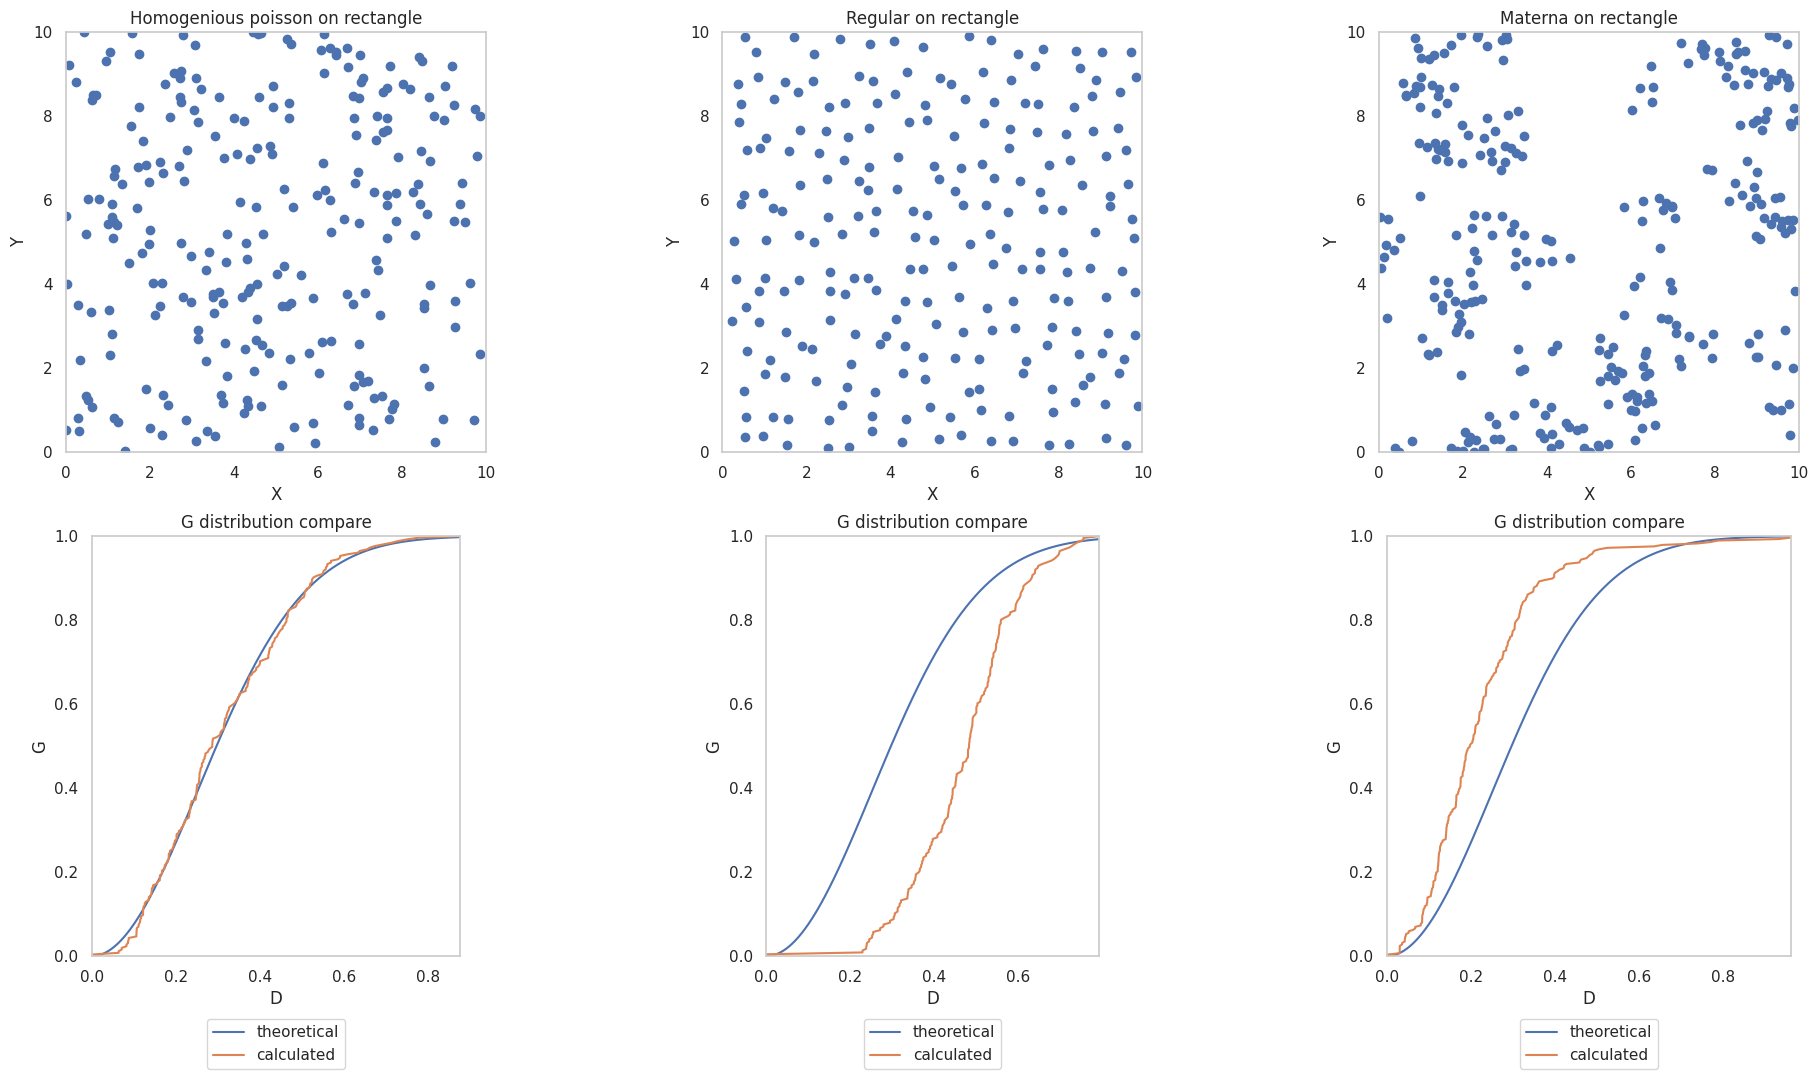

In [8]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,3,figsize=(24,12))
ax[0,0].grid(False)
ax[0,0].scatter(poisson["X"],poisson["Y"])
ax[0,0].set_title("Homogenious poisson on rectangle")
ax[0,0].axis("square")
ax[0,0].set_xlim(x_lim)
ax[0,0].set_ylim(y_lim)
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].grid(False)
ax[0,1].scatter(regular["X"],regular["Y"])
ax[0,1].set_title("Regular on rectangle")
ax[0,1].axis("square")
ax[0,1].set_xlim(x_lim)
ax[0,1].set_ylim(y_lim)
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].grid(False)
ax[0,2].scatter(materna["X"],materna["Y"])
ax[0,2].set_title("Materna on rectangle")
ax[0,2].axis("square")
ax[0,2].set_xlim(x_lim)
ax[0,2].set_ylim(y_lim)
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].grid(False)
ax[1,0].plot(teoretic_poisson["D"],teoretic_poisson["G"],label='theoretical')
ax[1,0].plot(result_poisson["D"],result_poisson["G"],label='calculated')
ax[1,0].set_title("G distribution compare")
ax[1,0].axis("square")
ax[1,0].set_xlim([0,np.max(result_poisson["D"])])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("G")
ax[1,0].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,1].grid(False)
ax[1,1].plot(teoretic_regular["D"],teoretic_regular["G"],label='theoretical')
ax[1,1].plot(result_regular["D"],result_regular["G"],label='calculated')
ax[1,1].set_title("G distribution compare")
ax[1,1].axis("square")
ax[1,1].set_xlim([0,np.max(result_regular["D"])])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("G")
ax[1,1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,2].grid(False)
ax[1,2].plot(teoretic_materna["D"],teoretic_materna["G"],label='theoretical')
ax[1,2].plot(result_materna["D"],result_materna["G"],label='calculated')
ax[1,2].set_title("G distribution compare")
ax[1,2].axis("square")
ax[1,2].set_xlim([0,np.max(result_materna["D"])])
ax[1,2].set_ylim([0,1])
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("G")
ax[1,2].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [9]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    d=sp.spatial.distance.cdist(points,test_points)
    d=np.sort(d,axis=0)
    d=np.sort(d[0,:])
    dUniq=np.unique(d)
    F=np.array([sum(d<=i) for i in dUniq])/len(d)
    d=dUniq
    d=np.insert(d,0,0)
    F=np.insert(F,0,0)
    return pd.DataFrame({"D":d,"F":F})
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    F=1-np.exp(-intensity*np.pi*d*d)
    df={"D":d,"F":F}
    return pd.DataFrame(df)

#### b) Wygenerowanie danych

In [10]:
# YOUR CODE HERE
test_points = homogeneous_poisson_on_rectangle(50,x_lim,y_lim)
result_poisson=f_function(poisson,test_points)
result_regular=f_function(regular,test_points)
result_materna=f_function(materna,test_points)
teoretic_poisson=f_function_poisson(np.linspace(0,np.max(result_poisson["D"]),num=2000,),2.5)
teoretic_regular=f_function_poisson(np.linspace(0,np.max(result_regular["D"]),num=2000,),2.5)
teoretic_materna=f_function_poisson(np.linspace(0,np.max(result_materna["D"]),num=2000,),2.5)

#### c) Wizualizacja

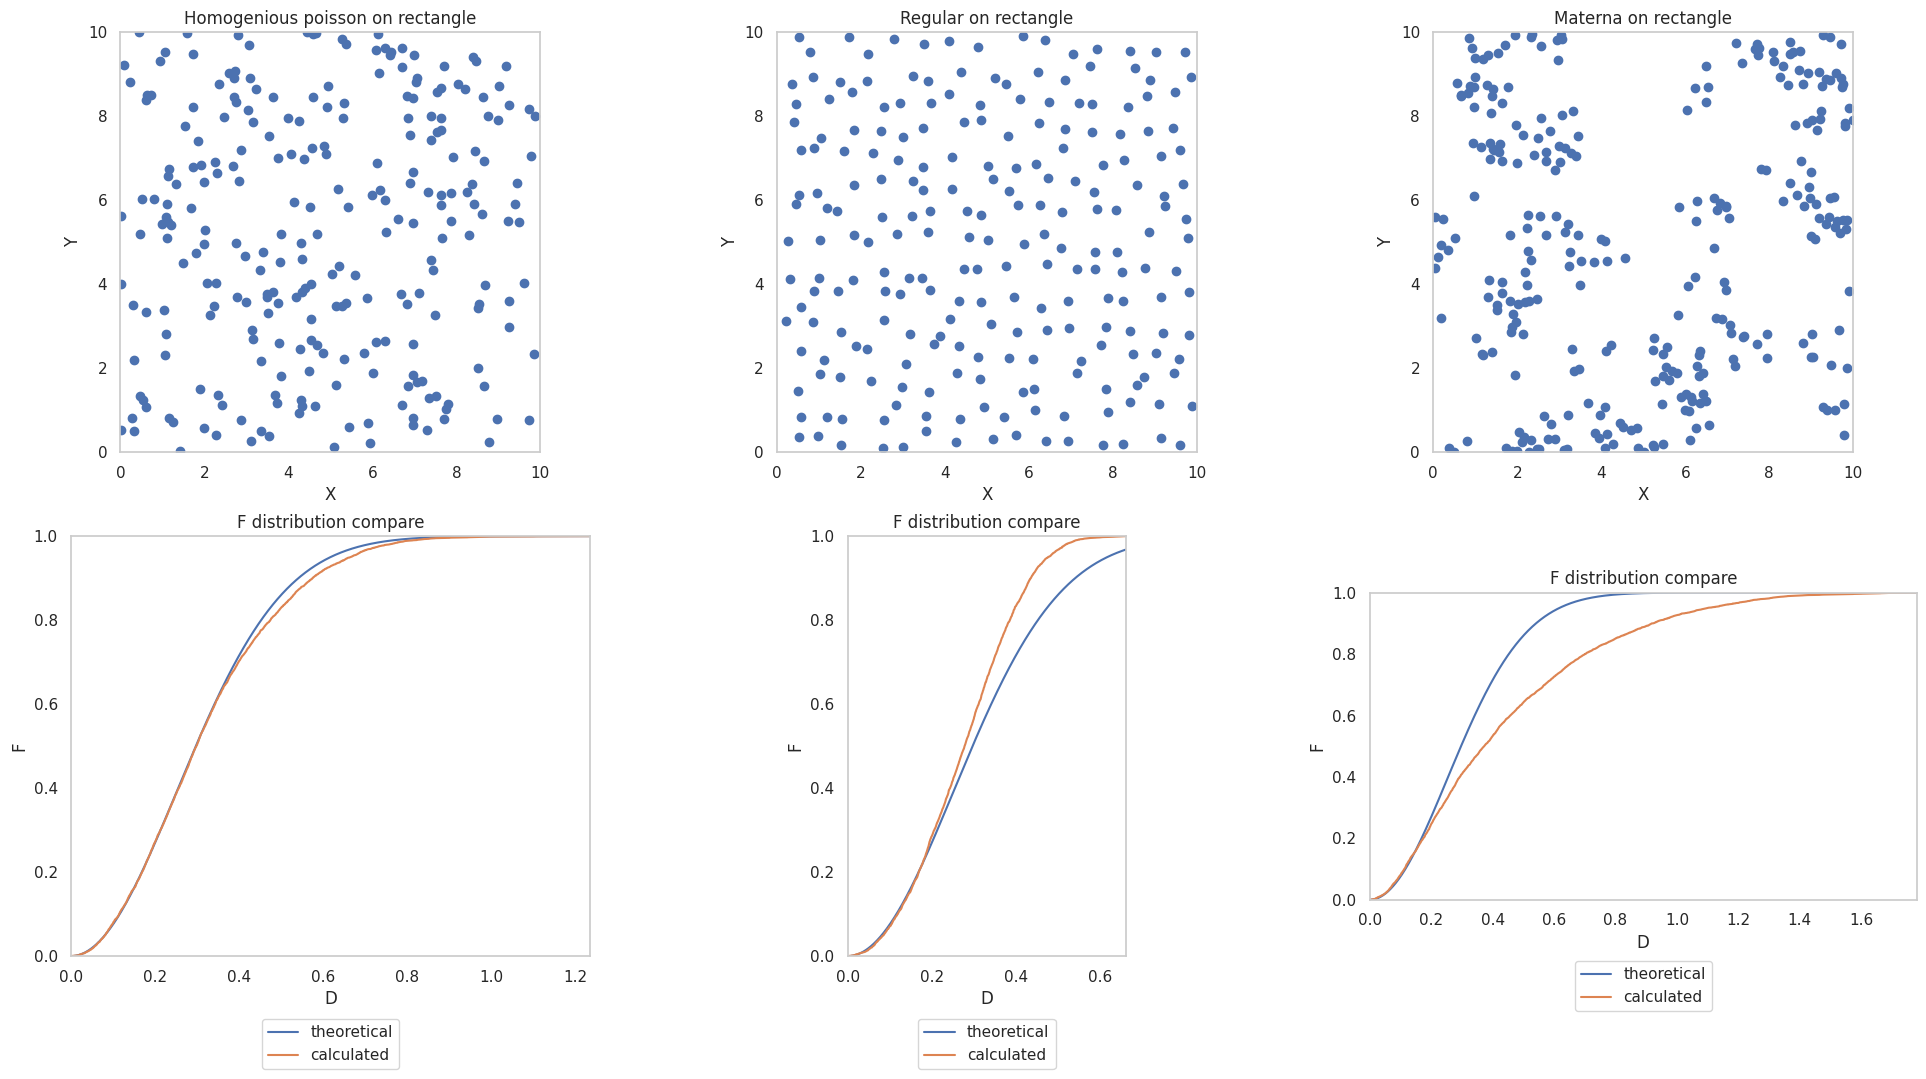

In [11]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,3,figsize=(24,12))
ax[0,0].grid(False)
ax[0,0].scatter(poisson["X"],poisson["Y"])
ax[0,0].set_title("Homogenious poisson on rectangle")
ax[0,0].axis("square")
ax[0,0].set_xlim(x_lim)
ax[0,0].set_ylim(y_lim)
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].grid(False)
ax[0,1].scatter(regular["X"],regular["Y"])
ax[0,1].set_title("Regular on rectangle")
ax[0,1].axis("square")
ax[0,1].set_xlim(x_lim)
ax[0,1].set_ylim(y_lim)
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].grid(False)
ax[0,2].scatter(materna["X"],materna["Y"])
ax[0,2].set_title("Materna on rectangle")
ax[0,2].axis("square")
ax[0,2].set_xlim(x_lim)
ax[0,2].set_ylim(y_lim)
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].grid(False)
ax[1,0].plot(teoretic_poisson["D"],teoretic_poisson["F"],label='theoretical')
ax[1,0].plot(result_poisson["D"],result_poisson["F"],label='calculated')
ax[1,0].set_title("F distribution compare")
ax[1,0].axis("square")
ax[1,0].set_xlim([0,np.max(result_poisson["D"])])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("F")
ax[1,0].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,1].grid(False)
ax[1,1].plot(teoretic_regular["D"],teoretic_regular["F"],label='theoretical')
ax[1,1].plot(result_regular["D"],result_regular["F"],label='calculated')
ax[1,1].set_title("F distribution compare")
ax[1,1].axis("square")
ax[1,1].set_xlim([0,np.max(result_regular["D"])])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("F")
ax[1,1].legend(bbox_to_anchor=(0.5, -0.15),loc='upper center', borderaxespad=0.)

ax[1,2].grid(False)
ax[1,2].plot(teoretic_materna["D"],teoretic_materna["F"],label='theoretical')
ax[1,2].plot(result_materna["D"],result_materna["F"],label='calculated')
ax[1,2].set_title("F distribution compare")
ax[1,2].axis("square")
ax[1,2].set_xlim([0,np.max(result_materna["D"])])
ax[1,2].set_ylim([0,1])
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("F")
ax[1,2].legend(bbox_to_anchor=(0.5, -0.2),loc='upper center', borderaxespad=0.)